In [26]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Ensure Consistent Results
tf.random.set_seed(42)

In [28]:
# Step 1 : Data Loading
print("--- Step 1 : Loading ---")
try:
  df = pd.read_csv('Telco_Cusomer_Churn.csv')
except FileNotFoundError:
  print("File Not Found")

--- Step 1 : Loading ---


In [29]:
# Getting the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# Getting an idea about the duplicate rows in the data
df.duplicated().sum()

np.int64(0)

In [31]:
# np.int64(0) means that there are no duplicate rows in the dataset.

In [32]:
# Getting an idea about the shape of the data
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (7043, 21)
Rows : 7043
Columns : 21


In [33]:
# Getting an idea about NULL values in the dataset
df.isnull().sum().any()

np.False_

In [34]:
# np.False_ means that there are no NULL values in the dataset.

In [35]:
# Getting an idea about the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


--- Step 2 : EDA ---


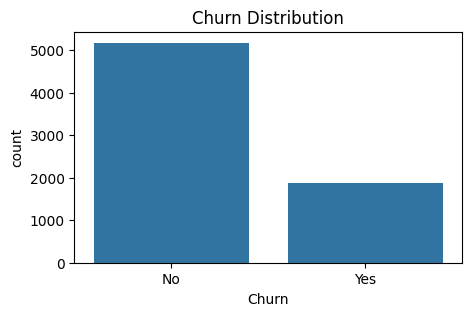

In [36]:
# Step 2 : Exploratory Data Analysis
print("--- Step 2 : EDA ---")
# Churn Distribution
plt.figure(figsize = (5, 3))
sns.countplot(x = df['Churn'])
plt.title('Churn Distribution')
plt.show()

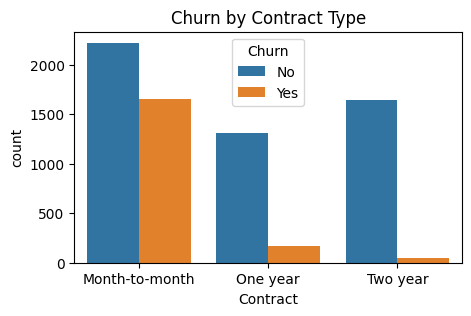

In [37]:
# Churn by Contract Type
plt.figure(figsize = (5,3))
sns.countplot(x = df['Contract'], hue = df['Churn'])
plt.title('Churn by Contract Type')
plt.show()

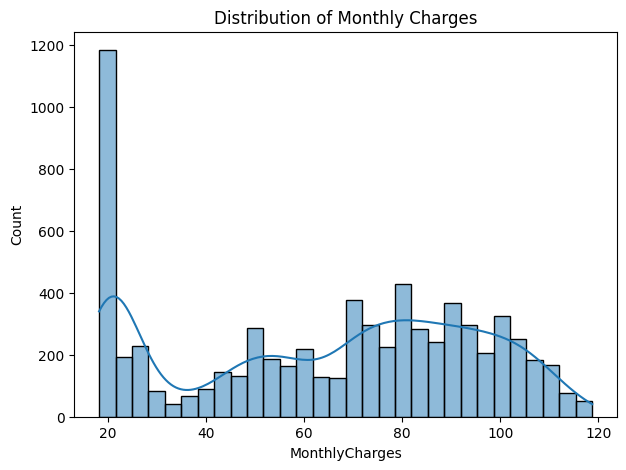

In [38]:
# Distribution of Monthly Charges
plt.figure(figsize = (7, 5))
sns.histplot(df['MonthlyCharges'], bins = 30, kde = True)
plt.title('Distribution of Monthly Charges')
plt.show()

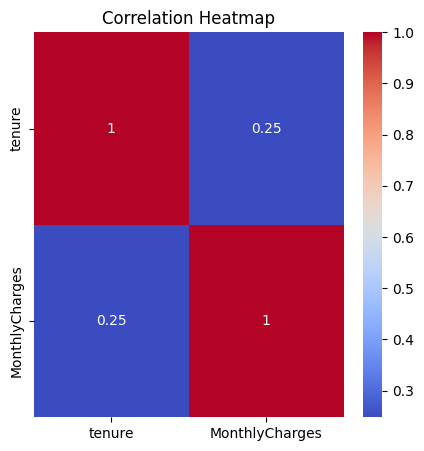

In [39]:
# Correlation Heatmap
numerical_features_to_plot = ['tenure', 'MonthlyCharges']
plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_features_to_plot].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Handle TotalCharges data type issue
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
# We have 11 NULL values in 'TotalCharges' now.

In [42]:
# Verifying
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [43]:
# Removing missing rows with NULL Values
df.dropna(inplace = True)
df.isnull().sum().any()

np.False_

In [44]:
# np.False_ means that there are no NULL values in the data.

In [45]:
# Seperating input features and target variable
X = df.drop(['Churn', 'customerID'], axis = 1)
y = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [46]:
# Identifying numerical features and categorical features
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [47]:
# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ]
)

In [48]:
# Split data into training and testing data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5,
                                                stratify = y_temp, random_state = 42)

In [49]:
# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)
input_shape = X_train_preprocessed.shape[1]
print('Number of Columns in input data:',input_shape)

Number of Columns in input data: 30


In [50]:
# Step 4 : Simple Architecture
print("--- Model 1 : Simple Architecture (1 Hidden Layer, 8 Neurons) with patience = 3 ---")
model1 = Sequential([
    Dense(8, activation = 'relu', input_shape = (input_shape,)),
    Dense(1, activation = 'sigmoid')
])

--- Model 1 : Simple Architecture (1 Hidden Layer, 8 Neurons) with patience = 3 ---


In [51]:
# Compiling the model
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['recall'])

In [52]:
# Early Stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

In [53]:
# Fitting the model
history1 = model1.fit(X_train_preprocessed, y_train,
                      validation_data = (X_val_preprocessed, y_val), verbose = 1,
                      epochs = 100, batch_size = 32, callbacks = [early_stopping])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7808 - recall: 0.7729 - val_loss: 0.4865 - val_recall: 0.3422
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4678 - recall: 0.4247 - val_loss: 0.4582 - val_recall: 0.5027
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4420 - recall: 0.5177 - val_loss: 0.4528 - val_recall: 0.5241
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4340 - recall: 0.5305 - val_loss: 0.4509 - val_recall: 0.5294
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4293 - recall: 0.5362 - val_loss: 0.4504 - val_recall: 0.5348
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4262 - recall: 0.5408 - val_loss: 0.4504 - val_recall: 0.5401
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4239 - recall: 0.5442 - val_loss: 0.4506 - val_recall: 0.5187
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4222 - recall: 0.5486 - val_loss: 0.4507 - val_recall: 0.5080


In [54]:
# Model 2 : Intermediate Architecture
print("--- Model 2 : Intermediate Architecture (2 Hidden Layers, 32/16 Neurons) with patience = 5 ---")
model2 = Sequential([
    Dense(32, activation = 'relu', input_shape = (input_shape,)),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

--- Model 2 : Intermediate Architecture (2 Hidden Layers, 32/16 Neurons) with patience = 5 ---


In [55]:
# Compiling the model
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['recall'])

In [56]:
# Early Stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [57]:
# Fitting the model
history2 = model2.fit(X_train_preprocessed, y_train, verbose = 1,
                      epochs = 100, batch_size = 32, callbacks = [early_stopping],
                      validation_data = (X_val_preprocessed, y_val))

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5204 - recall: 0.4148 - val_loss: 0.4582 - val_recall: 0.5294
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4325 - recall: 0.5561 - val_loss: 0.4535 - val_recall: 0.5455
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4253 - recall: 0.5552 - val_loss: 0.4519 - val_recall: 0.5455
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4211 - recall: 0.5677 - val_loss: 0.4513 - val_recall: 0.5508
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4175 - recall: 0.5673 - val_loss: 0.4510 - val_recall: 0.5561
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4150 - recall: 0.5678 - val_loss: 0.4511 - val_recall: 0.5508
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4129 - recall: 0.5681 - val_loss: 0.4510 - val_recall: 0.5455
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4113 - recall: 0.5698 - val_loss: 0.4510 - val_recall: 0.5455


In [58]:
# Model 3 : Advanced Architecture
print('\n--- Advanced (3 Hidden Layers, Dropout) with patience = 7')
model3 = Sequential([
    Dense(64, activation = 'relu', input_shape = (input_shape, )), # Hidden Layer 1
    Dropout(0.2),
    Dense(32, activation = 'relu'), # Hidden Layer 2
    Dropout(0.2),
    Dense(16, activation = 'relu'), # Hidden Layer 3
    Dropout(0.2),
    Dense(1, activation = 'sigmoid') # Output Layer
])


--- Advanced (3 Hidden Layers, Dropout) with patience = 7


In [61]:
# Compiling the model
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['recall'])

In [62]:
# Early Stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights = True)

In [86]:
# Fitting the model
history3 = model3.fit(X_train_preprocessed, y_train, verbose = 1,
                      epochs = 100, batch_size = 32, callbacks = [early_stopping],
                      validation_data = (X_val_preprocessed, y_val))

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4326 - recall: 0.5181 - val_loss: 0.4468 - val_recall: 0.4866
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4256 - recall: 0.5088 - val_loss: 0.4469 - val_recall: 0.5401
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4252 - recall: 0.5118 - val_loss: 0.4480 - val_recall: 0.4652
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4268 - recall: 0.5099 - val_loss: 0.4491 - val_recall: 0.5348
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4174 - recall: 0.5177 - val_loss: 0.4504 - val_recall: 0.4813
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4236 - recall: 0.5055 - val_loss: 0.4506 - val_recall: 0.4973
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4168 - recall: 0.5243 - val_loss: 0.4510 - val_recall: 0.4813
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4169 - recall: 0.5138 - val_loss: 0.4535 - val_recall: 0.4920


In [89]:
# Step 5 : Model Evaluation
print("--- Model Evaluation ---")
_, rec1 = model1.evaluate(X_test_preprocessed, y_test, verbose = 0)
_, rec2 = model2.evaluate(X_test_preprocessed, y_test, verbose = 0)
_, rec3 = model3.evaluate(X_test_preprocessed, y_test, verbose = 0)

--- Model Evaluation ---


In [90]:
# printing the output
print(f"Model 1 (Simple) Test Recall : {rec1:.3f}")
print(f"Model 2 (Intermediate) Test Recall : {rec2:.3f}")
print(f"Model 3 (Advanced) Test Recall : {rec3:.3f}")

Model 1 (Simple) Test Recall : 0.588
Model 2 (Intermediate) Test Recall : 0.599
Model 3 (Advanced) Test Recall : 0.524


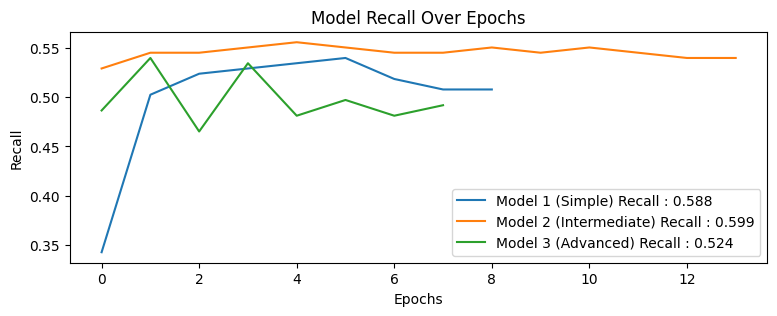

In [91]:
# Plot
plt.figure(figsize = (9, 3))
plt.plot(history1.history['val_recall'], label = f'Model 1 (Simple) Recall : {rec1:.3f}')
plt.plot(history2.history['val_recall'], label = f'Model 2 (Intermediate) Recall : {rec2:.3f}')
plt.plot(history3.history['val_recall'], label = f'Model 3 (Advanced) Recall : {rec3:.3f}')
plt.title('Model Recall Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
'''
Since, we are in underfitting region, I have increased the number of layers
as well as the number of neurons in each layer.
'''

In [102]:
# Model 4 : Advanced Architecture (after observing the performance)
print('\n--- Advanced (6 Hidden Layers, Dropout)')
model4 = Sequential([
    Dense(512, activation = 'relu', input_shape = (input_shape, )), # Hidden Layer 1
    Dropout(0.1),
    Dense(256, activation = 'relu'), # Hidden Layer 2
    Dropout(0.1),
    Dense(128, activation = 'relu'), # Hidden Layer 3
    Dropout(0.1),
    Dense(64, activation = 'relu'), # Hidden Layer 4
    Dropout(0.1),
    Dense(32, activation = 'relu'), # Hidden Layer 5
    Dropout(0.1),
    Dense(16, activation = 'relu'), # Hidden Layer 6
    Dropout(0.1),
    Dense(1, activation = 'sigmoid') # Output Layer
])


--- Advanced (6 Hidden Layers, Dropout)


In [100]:
# Fitting the model
history4 = model4.fit(X_train_preprocessed, y_train, verbose = 1,
                      epochs = 100, batch_size = 32,
                      validation_data = (X_val_preprocessed, y_val))

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1002 - recall: 0.9093 - val_loss: 2.0844 - val_recall: 0.4866
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1095 - recall: 0.9065 - val_loss: 1.9821 - val_recall: 0.4973
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0910 - recall: 0.9170 - val_loss: 2.0750 - val_recall: 0.4759
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1112 - recall: 0.8967 - val_loss: 1.9075 - val_recall: 0.4706
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0924 - recall: 0.9238 - val_loss: 2.2109 - val_recall: 0.4545
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1060 - recall: 0.9183 - val_loss: 2.0588 - val_recall: 0.4706
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0917 - recall: 0.8986 - val_loss: 2.5285 - val_recall: 0.4652
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1096 - recall: 0.9090 - val_loss: 2.4881 - val_recall: 0.449

In [103]:
# Compiling the model
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['recall'])

In [105]:
# Early Stopping
early_stopping = EarlyStopping(monitor = 'val_recall', patience = 20, restore_best_weights = True)

In [108]:
# Fitting the model
history4 = model4.fit(X_train_preprocessed, y_train, verbose = 1,
                      epochs = 100, batch_size = 32, callbacks = [early_stopping],
                      validation_data = (X_val_preprocessed, y_val))

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3387 - recall: 0.7022 - val_loss: 0.6023 - val_recall: 0.6257
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3100 - recall: 0.7422 - val_loss: 0.6708 - val_recall: 0.5668
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3145 - recall: 0.7578 - val_loss: 0.6873 - val_recall: 0.4973
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2988 - recall: 0.7603 - val_loss: 0.7207 - val_recall: 0.5401
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2975 - recall: 0.7537 - val_loss: 0.7558 - val_recall: 0.4813
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2690 - recall: 0.7802 - val_loss: 0.7995 - val_recall: 0.5455
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2738 - recall: 0.7795 - val_loss: 0.8107 - val_recall: 0.5561
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2603 - recall: 0.7878 - val_loss: 0.8649 - val_recall: 0.4759

In [99]:
'''
(1) We were getting under-fitted models till model3.
(2) Then we tried increasing the number of layers and number of neurons in each layer,
along with reducing dropout rate and removing EarlyStopping.
(3) Then, we were overfitting the data. Hence, we tried 0.3 and then 0.5 dropout rate from 0.1,
and we were able to tackle overfitting but the training and validation recall was close to 0.6
(4) Now, one of the major reasons for this issue may be the heavy amount of imbalance in the data.
Since, we have considerably less amount of data for class 1, our model is not getting
sufficient data of class 1 to learn the propoerties as opposed to class 0.
(5) Hence, to tackle this issue, we can use undersampling / oversampling techniques
to balance out the data (Homework).

'\n(1) We were getting under-fitted models till model3.\n(2) Then we tried increasing the number of layers and number of neurons in each layer,\nalong with reducing dropout rate and removing EarlyStopping.\n(3) Then, we were overfitting the data\n'

In [107]:
# Saving the model and estimator
import pickle
model4.save('best_ann_model.h5')
with open('preprocessor.pkl', 'wb') as f:
  pickle.dump(preprocessor, f)